In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import balanced_accuracy_score, roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import plot_tree
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest,mutual_info_classif


from imblearn.combine import SMOTEENN

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("C:\\Users\\poluk\\Desktop\\AI_ML_Projects\\Churn_Predection_API\\src\\Telecom_processed.csv")

In [3]:
data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber_optic,InternetService_No,Contract_One_year,Contract_Two_year,PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,1,1,1,0,1,0,1,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,0,1,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,0,1,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,0,1,0,0,45,0,1,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,1,1,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [4]:
data.columns = data.columns.str.replace(' ', '_')

<Axes: >

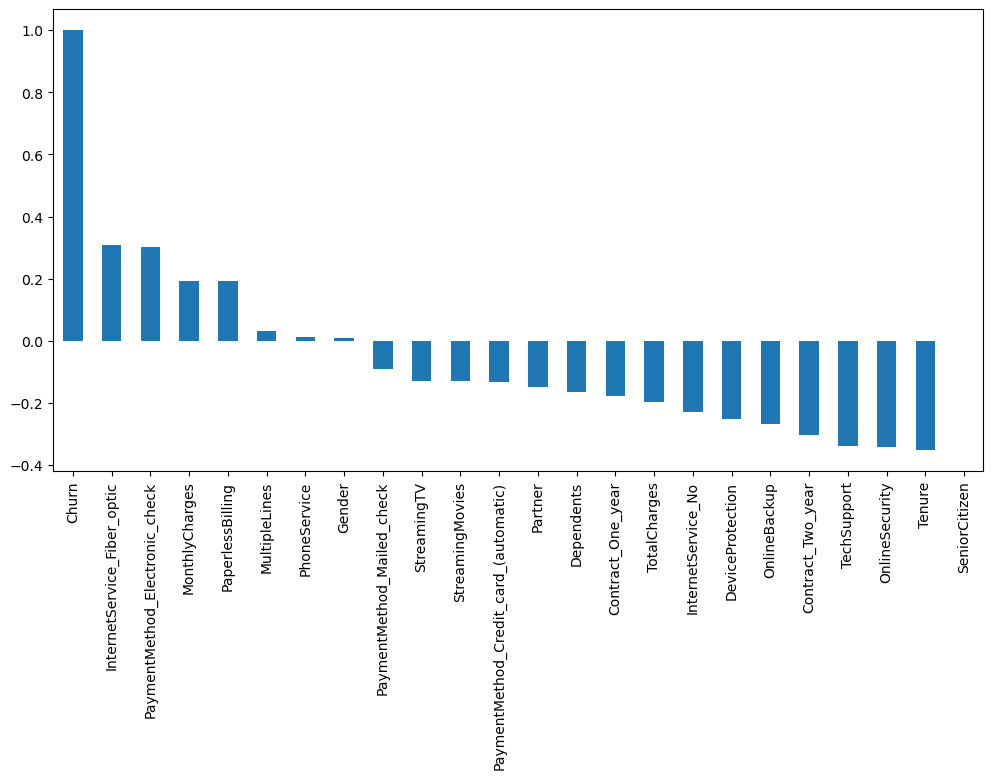

In [5]:
plt.figure(figsize=(12,6))
data.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')


In [6]:
data.rename(columns={'PaymentMethod_Credit_card_(automatic)': 'PaymentMethod_Credit_card_automatic'}, inplace=True)

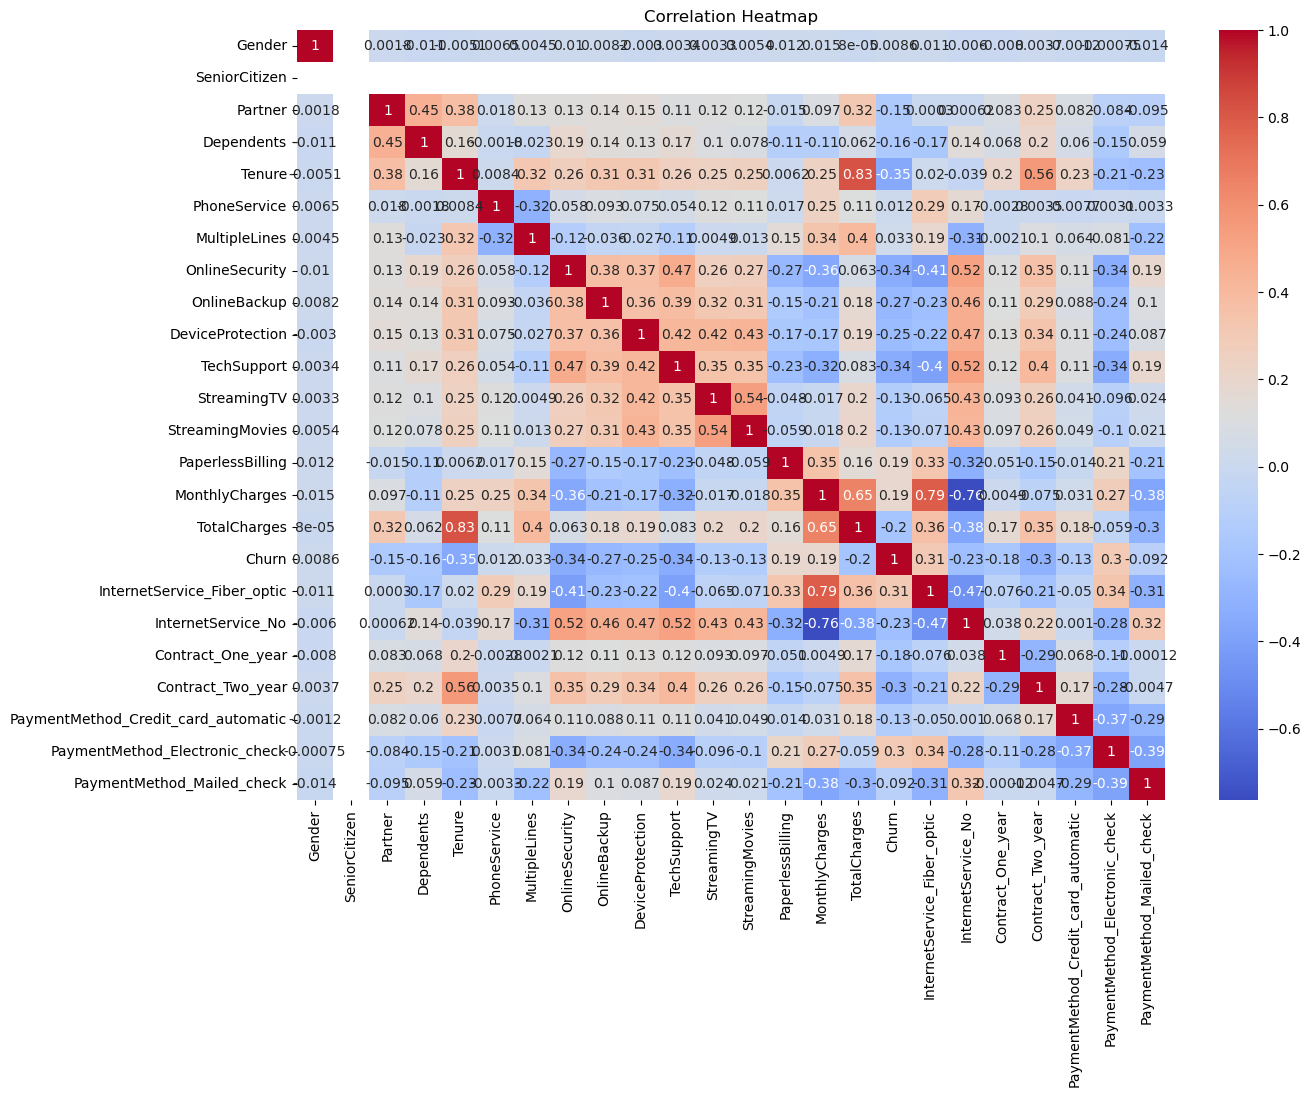

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [8]:
X=data.drop(columns=['Churn'])
y=data['Churn']

In [9]:
X.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber_optic,InternetService_No,Contract_One_year,Contract_Two_year,PaymentMethod_Credit_card_automatic,PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,1,1,1,0,1,0,1,0,1,0,...,1,29.85,29.85,0,0,0,0,0,1,0
1,0,1,0,0,34,1,0,1,0,1,...,0,56.95,1889.50,0,0,1,0,0,0,1
2,0,1,0,0,2,1,0,1,1,0,...,1,53.85,108.15,0,0,0,0,0,0,1
3,0,1,0,0,45,0,1,1,0,1,...,0,42.30,1840.75,0,0,1,0,0,0,0
4,1,1,0,0,2,1,0,0,0,0,...,1,70.70,151.65,1,0,0,0,0,1,0


In [10]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [11]:
selection = SelectKBest(score_func=mutual_info_classif, k=15)
X_selected = selection.fit_transform(X, y)
selected_features = X.columns[selection.get_support()]
print(selected_features)

Index(['Dependents', 'Tenure', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'InternetService_Fiber_optic',
       'InternetService_No', 'Contract_One_year', 'Contract_Two_year',
       'PaymentMethod_Electronic_check'],
      dtype='object')


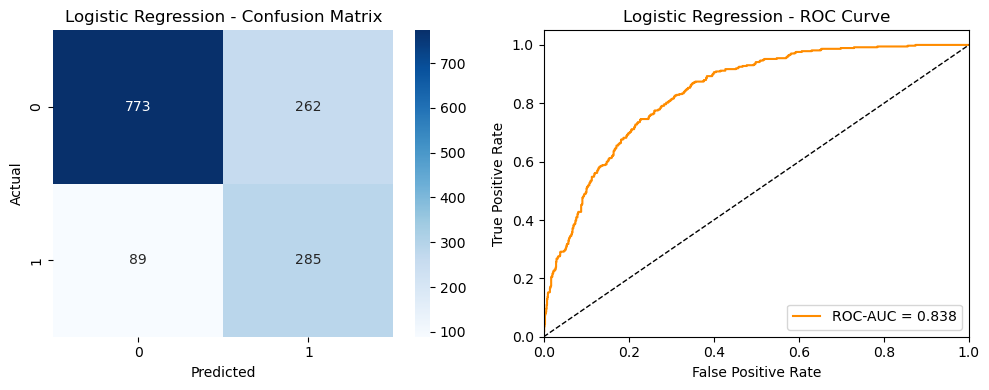

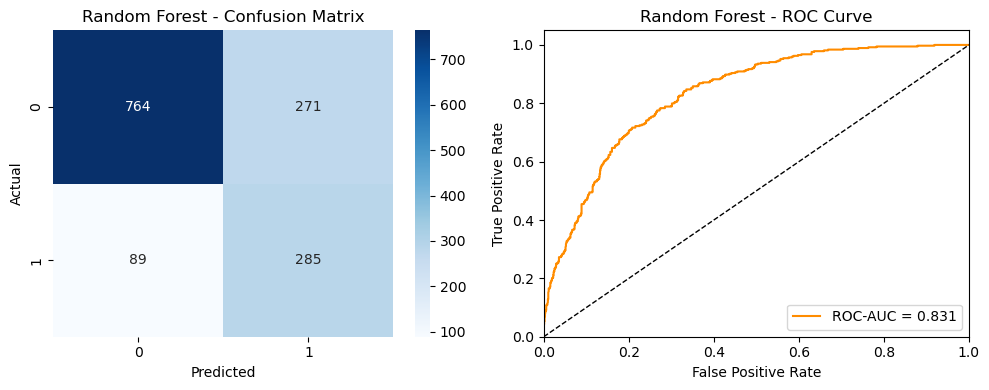

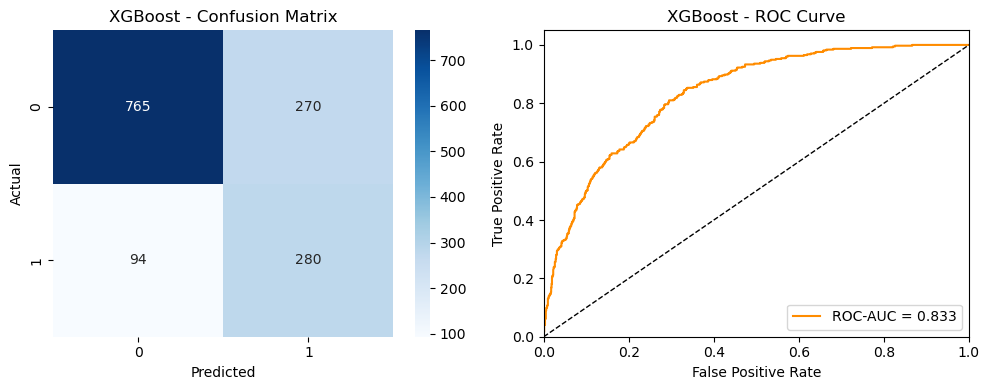

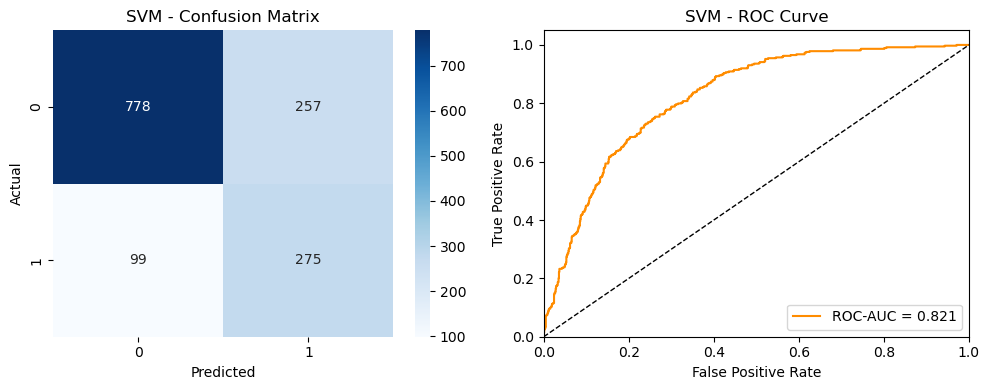


Model Comparison:
                 Model   ROC-AUC  Balanced Accuracy  Precision    Recall  \
0  Logistic Regression  0.837508           0.754446   0.521024  0.762032   
2              XGBoost  0.832751           0.743897   0.509091  0.748663   
1        Random Forest  0.830955           0.750098   0.512590  0.762032   
3                  SVM  0.821220           0.743492   0.516917  0.735294   

   F1-score  
0  0.618893  
2  0.606061  
1  0.612903  
3  0.607064  


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


smoteenn = SMOTEENN(random_state=42)
X_res, y_res = smoteenn.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(C=1, max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=300, max_depth=12, min_samples_split=4, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=5, subsample=0.8, colsample_bytree=0.8,
                                 use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM": SVC(C=1, kernel='rbf', gamma='scale', probability=True, random_state=42)
}



results = []

for name, model in models.items():
    model.fit(X_res_scaled, y_res)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    auc = roc_auc_score(y_test, y_prob)
    acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'ROC-AUC': auc,
        'Balanced Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-score': f1
    })

    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(1, 2, figsize=(10,4))

    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
    ax[0].set_title(f'{name} - Confusion Matrix')
    ax[0].set_xlabel('Predicted')
    ax[0].set_ylabel('Actual')

   
    ax[1].plot(fpr, tpr, label=f'ROC-AUC = {auc:.3f}', color='darkorange')
    ax[1].plot([0,1], [0,1], 'k--', lw=1)
    ax[1].set_xlim([0,1])
    ax[1].set_ylim([0,1.05])
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title(f'{name} - ROC Curve')
    ax[1].legend(loc='lower right')

    plt.tight_layout()
    plt.show()

results_df = pd.DataFrame(results).sort_values(by='ROC-AUC', ascending=False)
print("\nModel Comparison:")
print(results_df)


Running K-Fold CV for Logistic Regression...
Running K-Fold CV for Random Forest...
Running K-Fold CV for XGBoost...
Running K-Fold CV for SVM...

K-Fold Cross-Validation Results (5 folds):
                 Model  Mean ROC-AUC  Std ROC-AUC  Mean Accuracy  Std Accuracy
0  Logistic Regression      0.844979     0.012972       0.723135      0.015965
2              XGBoost      0.838202     0.010138       0.713137      0.017402
1        Random Forest      0.837582     0.012550       0.705777      0.008977
3                  SVM      0.795911     0.019265       0.703955      0.018860


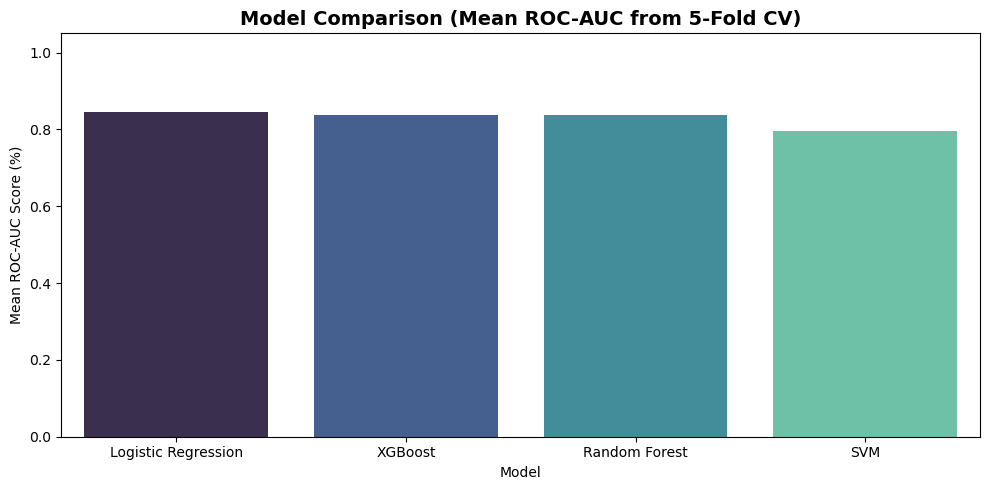

In [13]:
from sklearn.model_selection import StratifiedKFold

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results = []

for name, model in models.items():
    print(f"Running K-Fold CV for {name}...")

    auc_scores = cross_val_score(model, X_scaled, y, cv=kfold, scoring='roc_auc')
    acc_scores = cross_val_score(model, X_scaled, y, cv=kfold, scoring='balanced_accuracy')

    cv_results.append({
        'Model': name,
        'Mean ROC-AUC': auc_scores.mean(),
        'Std ROC-AUC': auc_scores.std(),
        'Mean Accuracy': acc_scores.mean(),
        'Std Accuracy': acc_scores.std()
    })

cv_df = pd.DataFrame(cv_results).sort_values(by='Mean ROC-AUC', ascending=False)
print("\nK-Fold Cross-Validation Results (5 folds):")
print(cv_df)

plt.figure(figsize=(10,5))

sns.barplot(x='Model', y='Mean ROC-AUC', data=cv_df, palette='mako')

plt.title('Model Comparison (Mean ROC-AUC from 5-Fold CV)', fontsize=14, weight='bold')
plt.ylabel('Mean ROC-AUC Score (%)')
plt.ylim(0, 1.05)
plt.xticks()


plt.tight_layout()
plt.show()


# Hyperparamter tuning for Xgboost

In [14]:
import joblib
from sklearn.model_selection import GridSearchCV, StratifiedKFold

xgb_clf = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1],
    'reg_lambda': [1, 5]
}

grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='roc_auc',
    n_jobs=-1,
    cv=kfold,
    verbose=2
)

grid_search.fit(X, y)

print("\n Best Parameters:")
print(grid_search.best_params_)

print("\n Best ROC-AUC Score:")
print(round(grid_search.best_score_, 4))

best_xgb = grid_search.best_estimator_
joblib.dump(best_xgb, 'xgb_churn_best.pkl')
print("\n Tuned XGBoost model saved as 'xgb_churn_best.pkl'")


Fitting 5 folds for each of 432 candidates, totalling 2160 fits

 Best Parameters:
{'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'reg_lambda': 5, 'subsample': 0.8}

 Best ROC-AUC Score:
0.8476

 Tuned XGBoost model saved as 'xgb_churn_best.pkl'


In [15]:
data.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_Fiber_optic', 'InternetService_No',
       'Contract_One_year', 'Contract_Two_year',
       'PaymentMethod_Credit_card_automatic', 'PaymentMethod_Electronic_check',
       'PaymentMethod_Mailed_check'],
      dtype='object')


Top 10 Important Features for Churn Prediction:

                           Feature  Importance
13                  MonthlyCharges       140.0
3                           Tenure       129.0
14                    TotalCharges        70.0
18               Contract_Two_year        47.0
15     InternetService_Fiber_optic        40.0
20  PaymentMethod_Electronic_check        32.0
17               Contract_One_year        29.0
12                PaperlessBilling        29.0
5                    MultipleLines        22.0
7                     OnlineBackup        21.0


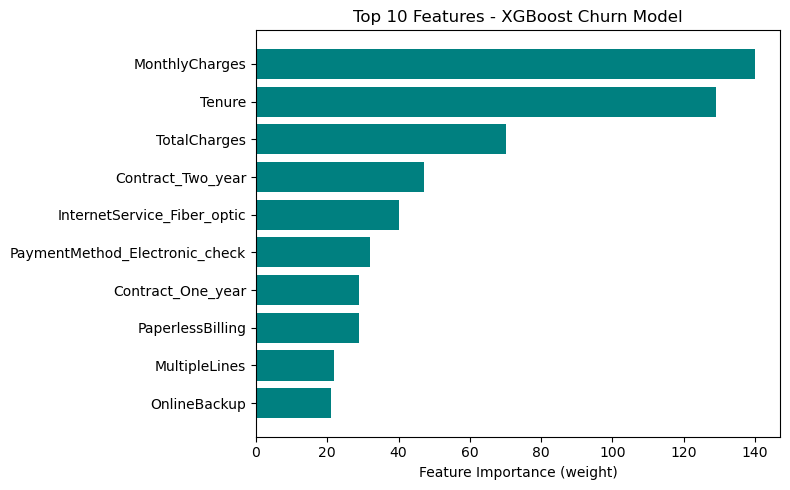

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib

# ✅ Load the tuned XGBoost model
best_xgb = joblib.load('xgb_churn_best.pkl')

# ✅ Get feature importance scores
importance_dict = best_xgb.get_booster().get_score(importance_type='weight')

# Convert to DataFrame
importance_df = pd.DataFrame({
    'Feature': list(importance_dict.keys()),
    'Importance': list(importance_dict.values())
}).sort_values(by='Importance', ascending=False)

# ✅ Display top 10 most important features
print("\nTop 10 Important Features for Churn Prediction:\n")
print(importance_df.head(10))

# ✅ Optional: visualize top 10
plt.figure(figsize=(8, 5))
plt.barh(
    importance_df.head(10)['Feature'][::-1],
    importance_df.head(10)['Importance'][::-1],
    color='teal'
)
plt.xlabel("Feature Importance (weight)")
plt.title("Top 10 Features - XGBoost Churn Model")
plt.tight_layout()
plt.show()
